In [4]:
import random
import numpy as np
import seaborn as sns
import math
import os
import time
import multiprocessing
from decimal import Decimal
import matplotlib.pyplot as plt
import traceback
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm, entropy
#from select_sensor import SelectSensor
from sensor import Sensor
import cupy as cp
import seaborn as sns
%matplotlib inline

In [30]:
%timeit np.random.normal(1.2, 1.5, (30, 100, 100, 100, 1))
%timeit cp.random.normal(1.2, 1.5, (30, 100, 100, 100, 1))

KeyboardInterrupt: 

In [ ]:
trans_i_mean = np.random.normal(0, 1, 1600)
%timeit diff_mean = trans_i_mean[:, None] - trans_i_mean[None, :]
%timeit diff_mean = np.square(diff_mean)

In [ ]:
trans_i_mean = cp.random.normal(0, 1, (40, 40, 40))
#diff_mean = trans_i_mean[:, None] - trans_i_mean[None, :]

In [ ]:
%timeit diags = cp.diagonal(trans_i_mean, axis1=1, axis2=2)
diags = cp.diagonal(trans_i_mean, axis1=1, axis2=2)
%timeit diags[:,:] = 0

In [ ]:
r = cp.arange(0, 40, dtype=int)
%timeit r = cp.arange(0, 40, dtype=int)
%timeit trans_i_mean[:, r, r] = 0

In [ ]:
add_reverse(trans_i_mean, 5, size=64)

In [ ]:
%timeit diff_mean * 16

In [ ]:
arr = trans_i_mean
mask = arr >=0.4
%timeit arr * 5
%timeit arr > 0.4
%timeit arr[arr >= 0.4] = 0
%timeit arr[mask] = 0

In [ ]:
clamp_generic = cp.ElementwiseKernel(
        'T x, T c',
        'T y',
        'y = (y > x)?c:y',
        'clamp_generic')
%timeit clamp_generic(0.4, 0, arr)

In [ ]:
time_per_sample = 804 / (30 * 10 ** 7)
cycles_per_sample = (2.5 * 10 ** 9) * time_per_sample
cycles_per_sample

In [ ]:
from randomgen import Generator, MT19937
rnd = Generator()
%timeit w = rnd.standard_normal(30 * (10 ** 6))

In [ ]:
import zignor
x = zignor.randn(3, 5, 5)
x.shape

In [ ]:
x = np.random.normal(1.2, 1.5, (30, 100, 100, 100, 1)).flatten()
%timeit x.astype(np.int, copy=False)

In [ ]:
x = np.random.normal(1.2, 1.5, (30, 100, 100, 100, 1))
%timeit y = np.trunc(x)

In [ ]:
from numpy.random import default_rng, SeedSequence
import multiprocessing
import concurrent.futures
import numpy as np

class MultithreadedRNG:
    def __init__(self, n, seed=None, threads=None):
        if threads is None:
            threads = multiprocessing.cpu_count()
        self.threads = threads

        seq = SeedSequence(seed)
        self._random_generators = [default_rng(s)
                                   for s in seq.spawn(threads)]

        self.n = n
        self.executor = concurrent.futures.ThreadPoolExecutor(threads)
        self.values = np.empty(n)
        self.step = np.ceil(n / threads).astype(np.int_)

    def fill(self):
        def _fill(random_state, out, first, last):
            random_state.standard_normal(out=out[first:last])

        futures = {}
        for i in range(self.threads):
            args = (_fill,
                    self._random_generators[i],
                    self.values,
                    i * self.step,
                    (i + 1) * self.step)
            futures[self.executor.submit(*args)] = i
        concurrent.futures.wait(futures)

    def __del__(self):
        self.executor.shutdown(False)

mrng = MultithreadedRNG(30 * (10 ** 6), seed=0)
%timeit mrng.fill()
mrng.values

In [ ]:
performance_greedy = np.array([0,  44, 115, 183, 230, 254, 300, 329, 362, 392, 420, 431, 440, 452, 458, 464, 470, 471, 479, 485, 491, 491, 493, 494, 494, 495, 496, 497, 497, 498, 498, 498, 498, 498, 499, 499, 499, 500, 500, 500, 500])
performance_greedy = performance_greedy / 5
performance_greedy2 = [0,  48,  84, 161, 205, 258, 290, 319, 349, 383, 394, 416, 433, 442, 446, 450, 465, 470, 479, 484, 490, 490, 491, 491, 495, 496, 497, 498, 498, 498, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
performance_greedy = (performance_greedy + (np.array(performance_greedy2)) / 5 ) / 2

performance_epsilon = np.array([0,  74, 211, 353, 431, 515, 585, 626, 681, 744, 798, 828, 857, 881, 896, 916, 933, 941, 957, 968, 972, 981, 980, 985, 986, 992, 992, 993, 995, 996, 997, 995, 997, 997, 998, 998, 998, 998, 998, 999, 998])
performance_epsilon = performance_epsilon / 10
performance_greedy, performance_epsilon
better = performance_greedy - performance_epsilon
better

In [31]:
performance_greedy = np.array([0,   1,   9,  15,  32,  46,  74,  97, 115, 128, 138, 145, 168, 183,
 192, 204, 217, 231, 239, 255, 260, 263, 272, 277, 280, 284, 289, 290,
 290, 291, 292, 293, 295, 297, 297, 296, 297, 297, 297, 297, 296])

performance_greedy2 = np.array([0,   3,  15,  24,  54,  95, 141, 189, 239, 296, 350, 377, 407, 454,
 478, 505, 523, 533, 556, 582, 593, 614, 624, 631, 638, 647, 653, 655,
 663, 667, 669, 675, 676, 679, 682, 687, 687, 688, 689, 689, 689])
performance_greedy = (performance_greedy + performance_greedy2) / 10
performance_greedy

array([ 0. ,  0.4,  2.4,  3.9,  8.6, 14.1, 21.5, 28.6, 35.4, 42.4, 48.8,
       52.2, 57.5, 63.7, 67. , 70.9, 74. , 76.4, 79.5, 83.7, 85.3, 87.7,
       89.6, 90.8, 91.8, 93.1, 94.2, 94.5, 95.3, 95.8, 96.1, 96.8, 97.1,
       97.6, 97.9, 98.3, 98.4, 98.5, 98.6, 98.6, 98.5])

In [32]:
epsilon_linear_decay = np.array([0,   90,  288,  510,  664,  750,  837,  881,  920,  950,  961,  977,
  985,  990,  993,  994,  996,  998,  998,  999,  999,  999, 1000, 1000,
  999,  999,  999, 1000, 1000,  999, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000])
epsilon_linear_decay = epsilon_linear_decay / 10
epsilon_linear_decay, performance_greedy

(array([  0. ,   9. ,  28.8,  51. ,  66.4,  75. ,  83.7,  88.1,  92. ,
         95. ,  96.1,  97.7,  98.5,  99. ,  99.3,  99.4,  99.6,  99.8,
         99.8,  99.9,  99.9,  99.9, 100. , 100. ,  99.9,  99.9,  99.9,
        100. , 100. ,  99.9, 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. , 100. , 100. , 100. ]),
 array([ 0. ,  0.4,  2.4,  3.9,  8.6, 14.1, 21.5, 28.6, 35.4, 42.4, 48.8,
        52.2, 57.5, 63.7, 67. , 70.9, 74. , 76.4, 79.5, 83.7, 85.3, 87.7,
        89.6, 90.8, 91.8, 93.1, 94.2, 94.5, 95.3, 95.8, 96.1, 96.8, 97.1,
        97.6, 97.9, 98.3, 98.4, 98.5, 98.6, 98.6, 98.5]))

In [33]:
epsilon_05_shrinking = np.array([0,  112,  323,  538,  688,  784,  854,  903,  932,  958,  974,  983,
  993,  995,  996,  996,  998, 1000,  999, 1000, 1000, 1000, 1000,  999,
  999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000])
epsilon_05_shrinking = epsilon_05_shrinking / 10
epsilon_05_shrinking

array([  0. ,  11.2,  32.3,  53.8,  68.8,  78.4,  85.4,  90.3,  93.2,
        95.8,  97.4,  98.3,  99.3,  99.5,  99.6,  99.6,  99.8, 100. ,
        99.9, 100. , 100. , 100. , 100. ,  99.9,  99.9, 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [34]:
epsilon_07_shrinking = np.array([0,   74,  249,  483,  661,  770,  835,  889,  927,  946,  961,  975,
  985,  991,  993,  998,  999,  999,  998,  998,  998,  999, 1000, 1000,
 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000])
epsilon_07_shrinking = epsilon_07_shrinking / 10
epsilon_07_shrinking

array([  0. ,   7.4,  24.9,  48.3,  66.1,  77. ,  83.5,  88.9,  92.7,
        94.6,  96.1,  97.5,  98.5,  99.1,  99.3,  99.8,  99.9,  99.9,
        99.8,  99.8,  99.8,  99.9, 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [35]:
epsilon_1_shrinking = np.array([0,  113,  314,  518,  670,  775,  842,  885,  912,  943,  966,  978,
  987,  991,  996,  996,  997,  999, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000])
epsilon_1_shrinking = epsilon_1_shrinking / 10
epsilon_1_shrinking

array([  0. ,  11.3,  31.4,  51.8,  67. ,  77.5,  84.2,  88.5,  91.2,
        94.3,  96.6,  97.8,  98.7,  99.1,  99.6,  99.6,  99.7,  99.9,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [36]:
ex_epsilon_1_shrinking = np.array([0,  105,  266,  519,  663,  751,  835,  900,  925,  945,  970,  982,
  987,  995,  996,  998,  998, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000])
ex_epsilon_1_shrinking = ex_epsilon_1_shrinking / 10
ex_epsilon_1_shrinking

array([  0. ,  10.5,  26.6,  51.9,  66.3,  75.1,  83.5,  90. ,  92.5,
        94.5,  97. ,  98.2,  98.7,  99.5,  99.6,  99.8,  99.8, 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [37]:
ex_epsilon_1_shrinking = np.array([0,   0,   4,  11,  29,  46,  73,  98, 116, 125, 146, 164, 187, 193,
 200, 208, 221, 229, 243, 250, 261, 271, 278, 277, 283, 283, 286, 286,
 287, 289, 290, 290, 293, 294, 294, 294, 294, 295, 295, 295, 295,])
ex_epsilon_1_shrinking += np.array([ 0,   0,   4,  15,  31,  48,  58,  71,  94, 105, 126, 140, 158, 174,
 195, 201, 209, 225, 232, 241, 251, 256, 265, 273, 272, 274, 278, 281,
 286, 286, 291, 292, 292, 296, 298, 299, 298, 300, 300, 300, 300])
ex_epsilon_1_shrinking += np.array([0,   2,  11,  23,  40,  56,  77, 109, 143, 162, 189, 198, 210, 230,
 258, 277, 289, 293, 307, 328, 340, 353, 357, 365, 370, 372, 373, 377,
 386, 388, 391, 391, 392, 394, 394, 394, 396, 396, 396, 396, 396,])
ex_epsilon_1_shrinking = np.around(ex_epsilon_1_shrinking / 10, decimals=1)
ex_epsilon_1_shrinking

array([ 0. ,  0.2,  1.9,  4.9, 10. , 15. , 20.8, 27.8, 35.3, 39.2, 46.1,
       50.2, 55.5, 59.7, 65.3, 68.6, 71.9, 74.7, 78.2, 81.9, 85.2, 88. ,
       90. , 91.5, 92.5, 92.9, 93.7, 94.4, 95.9, 96.3, 97.2, 97.3, 97.7,
       98.4, 98.6, 98.7, 98.8, 99.1, 99.1, 99.1, 99.1])

In [38]:
epsilon_05 = np.array([0,   79,  248,  489,  642,  757,  829,  873,  918,  951,  969,  983,
  991,  995,  996,  997,  998,  999,  999, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000,])
epsilon_05 = epsilon_05 / 10
epsilon_05

array([  0. ,   7.9,  24.8,  48.9,  64.2,  75.7,  82.9,  87.3,  91.8,
        95.1,  96.9,  98.3,  99.1,  99.5,  99.6,  99.7,  99.8,  99.9,
        99.9, 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [39]:
epsilon_1 = np.array([ 0,   4,  12,  43,  88, 146, 214, 267, 336, 397, 450, 498, 557, 606,
 645, 690, 719, 741, 777, 800, 826, 855, 880, 890, 909, 933, 934, 947,
 955, 960, 966, 970, 971, 974, 976, 978, 980, 985, 985, 986, 987])
epsilon_1 = epsilon_1 / 10
epsilon_1

array([ 0. ,  0.4,  1.2,  4.3,  8.8, 14.6, 21.4, 26.7, 33.6, 39.7, 45. ,
       49.8, 55.7, 60.6, 64.5, 69. , 71.9, 74.1, 77.7, 80. , 82.6, 85.5,
       88. , 89. , 90.9, 93.3, 93.4, 94.7, 95.5, 96. , 96.6, 97. , 97.1,
       97.4, 97.6, 97.8, 98. , 98.5, 98.5, 98.6, 98.7])

In [40]:
epsilon_15 = np.array([0,   5,  15,  37, 107, 171, 228, 283, 349, 390, 448, 505, 533, 592,
 633, 679, 718, 734, 763, 795, 829, 855, 871, 883, 904, 926, 931, 942,
 950, 958, 964, 971, 978, 979, 980, 982, 982, 984, 984, 985, 985,])
epsilon_15 = epsilon_15 / 10
epsilon_15

array([ 0. ,  0.5,  1.5,  3.7, 10.7, 17.1, 22.8, 28.3, 34.9, 39. , 44.8,
       50.5, 53.3, 59.2, 63.3, 67.9, 71.8, 73.4, 76.3, 79.5, 82.9, 85.5,
       87.1, 88.3, 90.4, 92.6, 93.1, 94.2, 95. , 95.8, 96.4, 97.1, 97.8,
       97.9, 98. , 98.2, 98.2, 98.4, 98.4, 98.5, 98.5])

In [41]:
ex_greedy = np.array([0,   86,  261,  489,  636,  735,  829,  893,  928,  948,  967,  982,
  990,  989,  994,  998,  999,  999,  998,  999,  999, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
 1000, 1000, 1000, 1000, 1000])
ex_greedy = ex_greedy / 10
ex_greedy, performance_greedy

(array([  0. ,   8.6,  26.1,  48.9,  63.6,  73.5,  82.9,  89.3,  92.8,
         94.8,  96.7,  98.2,  99. ,  98.9,  99.4,  99.8,  99.9,  99.9,
         99.8,  99.9,  99.9, 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. , 100. , 100. , 100. ]),
 array([ 0. ,  0.4,  2.4,  3.9,  8.6, 14.1, 21.5, 28.6, 35.4, 42.4, 48.8,
        52.2, 57.5, 63.7, 67. , 70.9, 74. , 76.4, 79.5, 83.7, 85.3, 87.7,
        89.6, 90.8, 91.8, 93.1, 94.2, 94.5, 95.3, 95.8, 96.1, 96.8, 97.1,
        97.6, 97.9, 98.3, 98.4, 98.5, 98.6, 98.6, 98.5]))

In [42]:
ts_1 = [0,   1,   0,   2,  10,  13,  20,  22,  27,  35,  46,  47,  54,  61,
  62,  70,  77,  78,  80,  87,  90,  92,  93,  94,  94,  95,  95,  94,
  94,  94,  95,  97,  98,  99, 100, 100, 100, 100, 100, 100, 100]
  
ts_2 = [0,   0,   1,   4,  11,  15,  19,  23,  37,  45,  48,  55,  60,  66,
  70,  76,  78,  81,  85,  88,  91,  94,  93,  97,  99,  99, 100, 100,
 100, 100, 100, 100,  99,  99, 100, 100, 100, 100, 100, 100, 100]
 
ts_3 = [0,   1,   5,   6,  10,  16,  21,  27,  33,  43,  48,  51,  55,  63,
66,  72,  76,  79,  81,  84,  87,  87,  90,  92,  95,  97,  99,  98,
97,  99,  99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

  
ts_4 = [0,  0,  2,  2,  7,  7, 14, 22, 28, 38, 38, 48, 52, 54, 59, 65, 71, 74,
76,  85,   87,  91, 91,  94,  96, 95, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97,
97, 98, 98, 98, 98]
 
ts_5 = [0,  2,  3,  7, 17, 22, 29, 37, 44, 48, 53, 62, 64, 67, 71, 74, 81, 82,
 82, 86, 88, 93, 93, 94, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96,
 96, 97, 97, 97, 97]
 
ts_6 = [0,  0,  1,  4, 10, 16, 27, 31, 31, 35, 39, 44, 49, 54, 61, 68, 76, 77,
 83, 85, 87, 85, 89, 88, 89, 89, 94, 95, 95, 96, 97, 98, 98, 98, 98, 98,
 98, 98, 98, 98, 98]
 
ts_7 = [0,  0,  5, 10, 15, 24, 31, 39, 42, 45, 60, 61, 64, 72, 74, 74, 76, 79,
 82, 83, 84, 88, 89, 91, 94, 96, 96, 96, 97, 97, 98, 98, 99, 99, 99, 99,
 99, 99, 99, 99, 99]
 
ts_8 = [0,   5,  15,  41,  57,  73,  93, 115, 134, 154, 187, 220, 242, 257,
 281, 292, 308, 312, 329, 333, 340, 349, 357, 365, 369, 374, 374, 380,
 383, 384, 384, 384, 387, 388, 388, 389, 391, 392, 391, 392, 391]

ts_1 = np.array(ts_1)
ts_2 = np.array(ts_2)
ts_3 = np.array(ts_3)
ts_4 = np.array(ts_4)
ts_5 = np.array(ts_5)
ts_6 = np.array(ts_6)
ts_7 = np.array(ts_7)
ts_8 = np.array(ts_8)

ts = ts_1 + ts_2 + ts_3 + ts_4 + ts_5 + ts_6 + ts_7 + ts_8
ts = ts / 10

ts, performance_greedy
ts - performance_greedy

array([ 0. ,  0.5,  0.8,  3.7,  5.1,  4.5,  3.9,  3. ,  2.2,  1.9,  3.1,
        6.6,  6.5,  5.7,  7.4,  8.2, 10.3,  9.8, 10.3,  9.4, 10.1, 10.2,
        9.9, 10.7, 11.3, 10.9, 10.7, 10.9, 10.6, 10.5, 10.5, 10.2, 10.3,
       10. ,  9.9,  9.6,  9.7,  9.9,  9.7,  9.8,  9.8])

In [43]:
ts = np.array([0,   4,   9,  21,  35,  57,  78,  95, 118, 136, 143, 157, 166, 179,
 193, 213, 236, 247, 250, 258, 264, 275, 279, 285, 285, 288, 292, 290,
 291, 293, 293, 294, 297, 297, 297, 297, 297, 297, 297, 297, 297]) #Wrong implementation
ts = np.array([0,   1,   8,  22,  33,  55,  66,  91, 114, 128, 147, 166, 179, 191,
 201, 215, 225, 233, 243, 250, 263, 271, 277, 278, 279, 283, 286, 287,
 289, 290, 292, 292, 292, 291, 292, 294, 296, 296, 296, 296, 296]) #Correct implementation
#ts = np.array(0.   3.   5.  21.  41.  59.  82. 106. 123. 135. 153. 162. 176. 188.
# 198. 212. 227. 232. 238. 248. 254. 258. 263. 270. 276. 278. 282. 284.
# 287. 287. 288. 289. 289. 288. 288. 290. 292. 293. 293. 293. 295.)
ts = np.around(ts / 3, decimals=1)
ts, performance_greedy, ts - performance_greedy

(array([ 0. ,  0.3,  2.7,  7.3, 11. , 18.3, 22. , 30.3, 38. , 42.7, 49. ,
        55.3, 59.7, 63.7, 67. , 71.7, 75. , 77.7, 81. , 83.3, 87.7, 90.3,
        92.3, 92.7, 93. , 94.3, 95.3, 95.7, 96.3, 96.7, 97.3, 97.3, 97.3,
        97. , 97.3, 98. , 98.7, 98.7, 98.7, 98.7, 98.7]),
 array([ 0. ,  0.4,  2.4,  3.9,  8.6, 14.1, 21.5, 28.6, 35.4, 42.4, 48.8,
        52.2, 57.5, 63.7, 67. , 70.9, 74. , 76.4, 79.5, 83.7, 85.3, 87.7,
        89.6, 90.8, 91.8, 93.1, 94.2, 94.5, 95.3, 95.8, 96.1, 96.8, 97.1,
        97.6, 97.9, 98.3, 98.4, 98.5, 98.6, 98.6, 98.5]),
 array([ 0. , -0.1,  0.3,  3.4,  2.4,  4.2,  0.5,  1.7,  2.6,  0.3,  0.2,
         3.1,  2.2,  0. ,  0. ,  0.8,  1. ,  1.3,  1.5, -0.4,  2.4,  2.6,
         2.7,  1.9,  1.2,  1.2,  1.1,  1.2,  1. ,  0.9,  1.2,  0.5,  0.2,
        -0.6, -0.6, -0.3,  0.3,  0.2,  0.1,  0.1,  0.2]))

In [44]:
ts_shrinking_90_300 =  np.array([0,   3,  19,  27,  38,  59,  80,  98, 122, 139, 154, 164, 184, 194,
 211, 225, 238, 247, 251, 259, 262, 270, 271, 275, 281, 282, 286, 286,
 288, 292, 294, 295, 295, 296, 297, 297, 297, 297, 297, 297, 297])
ts_shrinking_90_300 = np.around(ts_shrinking_90_300 / 3, decimals=1)

In [45]:
ts_shrinking_95_100 = np.array([0,   1,   5,  12,  18,  25,  28,  36,  42,  46,  55,  61,  64,  67,
  71,  70,  76,  78,  77,  82,  87,  92,  94,  93,  96,  97,  99,  99,
 100, 100, 100, 100, 100, 100,  99,  99, 100, 100, 100, 100, 100])
ts_shrinking_95_1000 = np.array([0,   6,  46, 100, 153, 223, 290, 347, 391, 453, 504, 549, 610, 651,
 704, 744, 775, 809, 842, 866, 896, 909, 920, 933, 945, 952, 960, 963,
 969, 971, 976, 978, 983, 985, 986, 988, 988, 989, 988, 989, 991,])
ts_shrinking_97_1000 = np.array([0,  11,  28,  73, 130, 195, 253, 331, 400, 454, 506, 569, 615, 677,
 720, 751, 777, 807, 831, 858, 879, 907, 918, 938, 949, 954, 961, 972,
 976, 978, 979, 984, 984, 987, 986, 988, 989, 989, 990, 990, 991,])
ts_shrinking_95_1000 = ts_shrinking_95_1000 / 10
ts_shrinking_97_1000 = ts_shrinking_97_1000 / 10

ts_shrinking_99_100 = np.array([0,   1,   3,  5,   9,   14,  24,  37,  46,  53,  54,  60,  61,  68,
  67, 73, 76, 80, 80, 83, 84, 87, 90, 90, 91, 92, 93, 93, 94, 95, 96, 97, 98, 98, 98, 98, 98, 98, 99, 99, 99,])

ts_shrinking_95_1000, ts_shrinking_97_1000, ts_shrinking_90_300, ts, performance_greedy, ts_shrinking_95_1000 - performance_greedy
# improv_95 = ((ts_shrinking_95_1000 - performance_greedy) / performance_greedy) * 100
# improv_97 = ((ts_shrinking_97_1000 - performance_greedy) / performance_greedy) * 100
# ts_shrinking_95_1000, ts_shrinking_97_1000, performance_greedy

(array([ 0. ,  0.6,  4.6, 10. , 15.3, 22.3, 29. , 34.7, 39.1, 45.3, 50.4,
        54.9, 61. , 65.1, 70.4, 74.4, 77.5, 80.9, 84.2, 86.6, 89.6, 90.9,
        92. , 93.3, 94.5, 95.2, 96. , 96.3, 96.9, 97.1, 97.6, 97.8, 98.3,
        98.5, 98.6, 98.8, 98.8, 98.9, 98.8, 98.9, 99.1]),
 array([ 0. ,  1.1,  2.8,  7.3, 13. , 19.5, 25.3, 33.1, 40. , 45.4, 50.6,
        56.9, 61.5, 67.7, 72. , 75.1, 77.7, 80.7, 83.1, 85.8, 87.9, 90.7,
        91.8, 93.8, 94.9, 95.4, 96.1, 97.2, 97.6, 97.8, 97.9, 98.4, 98.4,
        98.7, 98.6, 98.8, 98.9, 98.9, 99. , 99. , 99.1]),
 array([ 0. ,  1. ,  6.3,  9. , 12.7, 19.7, 26.7, 32.7, 40.7, 46.3, 51.3,
        54.7, 61.3, 64.7, 70.3, 75. , 79.3, 82.3, 83.7, 86.3, 87.3, 90. ,
        90.3, 91.7, 93.7, 94. , 95.3, 95.3, 96. , 97.3, 98. , 98.3, 98.3,
        98.7, 99. , 99. , 99. , 99. , 99. , 99. , 99. ]),
 array([ 0. ,  0.3,  2.7,  7.3, 11. , 18.3, 22. , 30.3, 38. , 42.7, 49. ,
        55.3, 59.7, 63.7, 67. , 71.7, 75. , 77.7, 81. , 83.3, 87.7, 90.3,
        92.3

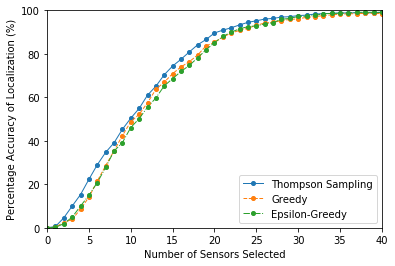

In [46]:
x = [i for i in range(0, 41)]
plt.plot(x, ts_shrinking_95_1000, linewidth=1, markersize=4, marker='o')
plt.plot(x, performance_greedy, '--', linewidth=1, markersize=4, marker='o')
plt.plot(x, ex_epsilon_1_shrinking, '-.', linewidth=1, markersize=4, marker='o')
plt.xlim([0, 40])
plt.ylim([0, 100])
plt.xlabel('Number of Sensors Selected')
plt.ylabel('Percentage Accuracy of Localization (%)')
plt.legend(['Thompson Sampling', 'Greedy', 'Epsilon-Greedy'])
plt.savefig('comparison_1600.png')

In [47]:
greedy_95_1 = np.array([0,   0,   1,   2,   3,   5,  10,  15,  19,  26,  39,  55,  65,  74,
  84,  95,  97, 106, 114, 124, 131, 137, 140, 144, 149, 156, 160, 163,
 168, 172, 175, 175, 180, 181, 182, 181, 183, 185, 187, 188, 189,])

greedy_95_2 = np.array([0,   0,   1,   3,   3,   7,  16,  24,  27,  35,  44,  53,  58,  71,
  80,  82,  89,  98, 107, 116, 124, 127, 129, 132, 133, 138, 144, 149,
 151, 151, 157, 162, 166, 167, 170, 169, 170, 175, 177, 178, 178,])

greedy_95_3 = np.array([0,   0,   0,   1,   4,   7,  14,  21,  23,  30,  41,  48,  60,  72,
  82,  89, 100, 109, 117, 123, 132, 136, 141, 146, 152, 153, 158, 164,
 167, 166, 168, 171, 174, 176, 178, 181, 184, 184, 184, 186, 186,])

greedy_95_4 = np.array([0,   0,   1,   2,   4,   5,  10,  12,  21,  32,  37,  44,  54,  62,
  71,  78,  81,  93,  99, 104, 115, 123, 126, 131, 135, 140, 146, 150,
 152, 151, 154, 161, 166, 170, 170, 174, 176, 178, 180, 184, 185,])

greedy_95_5 = np.array([0,   1,   0,   2,   4,  11,  10,  21,  25,  32,  37,  49,  63,  70,
  77,  85,  93, 100, 107, 110, 113, 121, 125, 131, 138, 143, 151, 155,
 157, 158, 161, 169, 171, 173, 175, 179, 180, 182, 184, 185, 186])

greedy = greedy_95_1 + greedy_95_2 + greedy_95_3 + greedy_95_4 + greedy_95_5
greedy = greedy / 10
greedy

array([ 0. ,  0.1,  0.3,  1. ,  1.8,  3.5,  6. ,  9.3, 11.5, 15.5, 19.8,
       24.9, 30. , 34.9, 39.4, 42.9, 46. , 50.6, 54.4, 57.7, 61.5, 64.4,
       66.1, 68.4, 70.7, 73. , 75.9, 78.1, 79.5, 79.8, 81.5, 83.8, 85.7,
       86.7, 87.5, 88.4, 89.3, 90.4, 91.2, 92.1, 92.4])

In [48]:
ts_95 = np.array([0,   2,  18,  38,  71, 116, 182, 233, 288, 337, 390, 457, 503, 540,
 587, 633, 673, 699, 734, 750, 775, 802, 812, 834, 853, 873, 889, 895,
 907, 911, 919, 931, 937, 945, 950, 956, 961, 966, 971, 976, 979,])
ts_95 = ts_95 / 10
ts_95

array([ 0. ,  0.2,  1.8,  3.8,  7.1, 11.6, 18.2, 23.3, 28.8, 33.7, 39. ,
       45.7, 50.3, 54. , 58.7, 63.3, 67.3, 69.9, 73.4, 75. , 77.5, 80.2,
       81.2, 83.4, 85.3, 87.3, 88.9, 89.5, 90.7, 91.1, 91.9, 93.1, 93.7,
       94.5, 95. , 95.6, 96.1, 96.6, 97.1, 97.6, 97.9])

In [49]:
ts_95_delta = ts_95 / np.max(ts_95)
np.around(ts_95_delta, decimals = 2)
num_sensors = 40
num_batches = 5
avg_batch_size = num_sensors // num_batches
ts_95_delta = ts_95_delta * 10
array = np.arange(1, 10 + 1, (10) // (num_batches), dtype='int')
if array[-1] < 10:
    array[-1] = 10.001
print(array, ts_95_delta)
j = 0
index_array = np.zeros(num_batches)
for i in range(len(ts_95_delta)):
    if ts_95_delta[i] > array[j]:
        index_array[j] = i
        j += 1
index_array[-1] = num_sensors + 1
index_array = index_array - 1
for i in range(len(index_array)-1, 0, -1):
    index_array[i] -= index_array[i-1]
ts_95_delta, array, index_array

[ 1  3  5  7 10] [ 0.          0.02042901  0.18386108  0.38815117  0.72522983  1.18488253
  1.85903984  2.37997957  2.94177732  3.44228805  3.98365679  4.6680286
  5.13789581  5.51583248  5.9959142   6.46578141  6.87436159  7.13993871
  7.49744637  7.66087845  7.91624106  8.19203269  8.29417773  8.51889683
  8.71297242  8.91726251  9.08069459  9.14198161  9.26455567  9.30541369
  9.38712972  9.50970378  9.57099081  9.65270684  9.70377937  9.76506639
  9.81613892  9.86721144  9.91828396  9.96935649 10.        ]


(array([ 0.        ,  0.02042901,  0.18386108,  0.38815117,  0.72522983,
         1.18488253,  1.85903984,  2.37997957,  2.94177732,  3.44228805,
         3.98365679,  4.6680286 ,  5.13789581,  5.51583248,  5.9959142 ,
         6.46578141,  6.87436159,  7.13993871,  7.49744637,  7.66087845,
         7.91624106,  8.19203269,  8.29417773,  8.51889683,  8.71297242,
         8.91726251,  9.08069459,  9.14198161,  9.26455567,  9.30541369,
         9.38712972,  9.50970378,  9.57099081,  9.65270684,  9.70377937,
         9.76506639,  9.81613892,  9.86721144,  9.91828396,  9.96935649,
        10.        ]),
 array([ 1,  3,  5,  7, 10]),
 array([ 4.,  4.,  3.,  5., 24.]))

In [50]:
ex_greedy_1 = [0,   0,   0,   4,   6,   9,  15,  17,  25,  31,  41,  48,  57,  63,
  72,  75,  85,  95,  98, 106, 114, 119, 128, 131, 136, 140, 145, 150,
 154, 158, 164, 164, 168, 172, 173, 173, 173, 175, 178, 179, 180,]

ex_greedy_2 = [0,   0,   0,   1,   5,  10,  19,  27,  31,  35,  38,  51,  60,  65,
  68,  76,  84,  92, 105, 110, 113, 120, 121, 129, 134, 142, 147, 156,
 160, 161, 164, 167, 171, 167, 169, 173, 174, 173, 177, 178, 179,]

ex_greedy_3 = [0,   0,   1,   2,   6,  12,  19,  25,  34,  39,  47,  56,  63,  72,
  76,  82,  89, 100, 108, 114, 115, 118, 125, 128, 135, 140, 144, 152,
 159, 161, 162, 162, 163, 168, 168, 172, 174, 177, 178, 181, 182,]

ex_greedy_4 = [0,   0,   1,   2,   8,  12,  18,  22,  33,  44,  47,  54,  61,  70,
  74,  82,  94,  98, 112, 122, 127, 130, 136, 146, 151, 155, 156, 162,
 167, 172, 171, 171, 174, 173, 173, 177, 179, 180, 181, 182, 184,]

ex_greedy_5 = [0,   0,   3,   4,   7,   9,  14,  14,  20,  27,  39,  45,  54,  58,
  66,  77,  87, 101, 105, 110, 113, 122, 131, 139, 141, 147, 151, 157,
 159, 164, 167, 169, 171, 172, 176, 176, 180, 181, 181, 181, 183,]

ex_greedy_1 = np.array(ex_greedy_1)
ex_greedy_2 = np.array(ex_greedy_2)
ex_greedy_3 = np.array(ex_greedy_3)
ex_greedy_4 = np.array(ex_greedy_4)
ex_greedy_5 = np.array(ex_greedy_5)

ex_greedy_4096 = (ex_greedy_1 + ex_greedy_2 + ex_greedy_3 + ex_greedy_4 + ex_greedy_5) / 10
ex_greedy_4096

array([ 0. ,  0. ,  0.5,  1.3,  3.2,  5.2,  8.5, 10.5, 14.3, 17.6, 21.2,
       25.4, 29.5, 32.8, 35.6, 39.2, 43.9, 48.6, 52.8, 56.2, 58.2, 60.9,
       64.1, 67.3, 69.7, 72.4, 74.3, 77.7, 79.9, 81.6, 82.8, 83.3, 84.7,
       85.2, 85.9, 87.1, 88. , 88.6, 89.5, 90.1, 90.8])

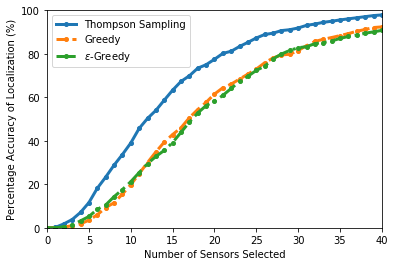

In [51]:
x = [i for i in range(0, 41)]
plt.plot(x, ts_95, linewidth=3, markersize=4, marker='o')
plt.plot(x, greedy, '--', linewidth=3, markersize=4, marker='o')
plt.plot(x, ex_greedy_4096, '-.', linewidth=3, markersize=4, marker='o')
plt.xlim([0, 40])
plt.ylim([0, 100])
plt.xlabel('Number of Sensors Selected')
plt.ylabel('Percentage Accuracy of Localization (%)')
plt.legend(['Thompson Sampling', 'Greedy', '$\epsilon$-Greedy'])
plt.savefig('comparison_4096.png')

In [52]:
ts_batch_best_500 = np.array([  0,   0,   0,   0,   9,   0,  23,   0,  65,   0,  81,  92,   0,   0,
 169,   0, 211,   0,   0,   0, 264,   0,   0,   0,   0, 368,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 471])

ts_batch_best_1000_15 = np.array([0,   0,   0,  11,   0,  27,  50,  77, 123, 140, 149,   0, 205, 347,
   0, 411,])
ts_batch_best_1000_20 = np.array([0,   0,   0,   0,  12,  16,  40,   0, 108, 116,   0, 171,   0, 328,
 350,   0, 460,   0,   0,   0, 573,])
ts_batch_best_1000_25 = np.array([0,   0,   0,   0,  15,  21,   0,  62,   0, 124, 137,   0, 198,   0,
 334,   0, 419,   0,   0,   0, 551,   0,   0,   0,   0, 733,])
ts_batch_best_1000_30 = np.array([  0,   0,   0,   0,  18,   0,  35,  75,   0, 146,   0, 191,   0, 345,
   0, 407,   0,   0, 498,   0,   0,   0, 618,   0,   0,   0,   0,   0,
   0,   0, 798,])
ts_batch_best_1000_35 = np.array([0,   0,   0,   0,  10,   0,  35,  59,   0, 121,   0, 187,   0, 355,
   0, 415,   0,   0,   0, 544,   0,   0,   0,   0, 720,   0,   0,   0,
   0,   0,   0,   0,   0,   0,   0, 890,])
ts_batch_best_1000_40 = np.array([0,   0,   0,   0,  19,   0,  42,   0, 113,   0, 152, 178,   0,   0,
 348,   0, 441,   0,   0,   0, 570,   0,   0,   0,   0, 730,   0,   0,
   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 936,])



# ts_batch_increasing_700 = [700 7 48,0
# 700 10 111,0
# 700 14 248,0
# 700 19 363,0
# 700 24 501,0
# 700 30 551,0
# 700 40 636,0
# ]
ts_batch_increasing_700 = np.array([0, 0, 0, 0, 0, 0, 0, 48, 0, 0, 111, 0, 0, 0, 248, 0, 0, 0, 0, 363, 0, 0, 0, 0, 501,
                          0, 0, 0, 0, 0, 551, 0, 0, 0, 0, 0, 0, 0, 0, 0, 636])
                                 
ts_batch_equal_1000 = np.array([  0,   0,   0,   0,  11,   0,   0,   0, 122,   0,   0,   0, 202,   0,
   0,   0, 445,   0,   0,   0, 565,   0,   0,   0, 726,   0,   0,   0,
 783,   0,   0,   0, 817,   0,   0,   0, 880,   0,   0,   0, 934])


ts_batch_decreasing_1000_15 = np.array([  0,   0,   0,   0,   0,   0,  39,  70, 113, 126, 151, 177, 213, 324,
 357, 400])
ts_batch_decreasing_1000_20 = np.array([  0,   0,   0,   0,   0,   0,   0,  79,   0, 139,   0, 185,   0, 339,
   0, 420, 450, 480, 492, 539, 581])
ts_batch_decreasing_1000_25 = np.array([  0,   0,   0,   0,   0,   0,   0,  77,   0,   0, 145,   0,   0, 329,
   0,   0, 420,   0, 490,   0, 562,   0, 616, 668, 742, 745])
ts_batch_decreasing_1000_30 = np.array([  0,   0,   0,   0,   0,   0,   0,   0,   0, 134,   0,   0,   0, 327,
   0,   0,   0, 472,   0,   0, 590,   0,   0, 696,   0, 763,   0, 801,
 806, 813, 818])
ts_batch_decreasing_1000_35 = np.array([ 0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150,   0,   0,   0,
   0, 397,   0,   0,   0, 524,   0,   0,   0, 663,   0,   0, 724,   0,
   0, 763,   0, 778,   0, 822, 853, 874])
ts_batch_decreasing_1000_40 = np.array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150,   0,   0,   0,
   0,   0, 447,   0,   0,   0,   0, 595,   0,   0,   0,   0, 748,   0,
   0,   0, 796,   0,   0, 838,   0,   0, 882,   0, 893, 912, 929])

In [53]:
for i in range(len(ts_batch_equal_1000)):
    if i % 4 != 0:
        base = i - (i % 4)
        next_base = base + 4
        distance_from_base = i - base
        distance_from_next_base = next_base - i
        slope = ts_batch_equal_1000[next_base] - ts_batch_equal_1000[base]
        ts_batch_equal_1000[i] = ts_batch_equal_1000[base] + slope * distance_from_base / 4
ts_batch_equal_1000

array([  0,   2,   5,   8,  11,  38,  66,  94, 122, 142, 162, 182, 202,
       262, 323, 384, 445, 475, 505, 535, 565, 605, 645, 685, 726, 740,
       754, 768, 783, 791, 800, 808, 817, 832, 848, 864, 880, 893, 907,
       920, 934])

In [54]:
ts_batch_increasing_700_adj = ts_batch_increasing_700 * 10 / 7
ts_batch_increasing_700_adj = np.round(ts_batch_increasing_700)
ts_batch_increasing_700_adj

array([  0,   0,   0,   0,   0,   0,   0,  48,   0,   0, 111,   0,   0,
         0, 248,   0,   0,   0,   0, 363,   0,   0,   0,   0, 501,   0,
         0,   0,   0,   0, 551,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 636])

[451, 623, 731, 810, 865] [419, 584, 690, 770, 830]


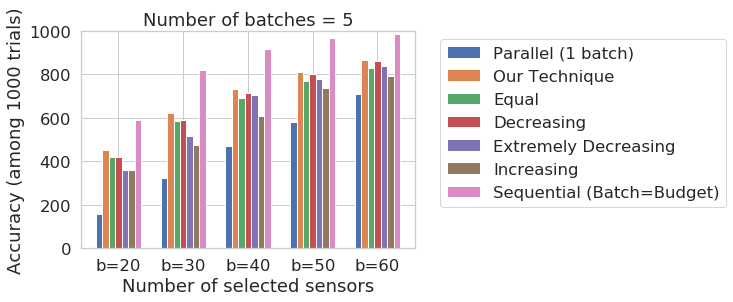

In [22]:

sns.set(style="whitegrid", font_scale=1.5)
barWidth = 0.1
 
# set height of bar
best_batch_bars = [451, 623, 731, 810, 865]

equal_batch_bars = [419, 584, 690, 770, 830]

decreasing_batch_bars = [419, 588, 712, 803, 863]

increasing_batch_bars = [360, 477, 610, 739, 794]

ex_decreasing_batch_bars = [358, 517, 706, 780, 840]

sequential_bars = [592, 819, 918, 966, 984]

parallel_bars = [157, 324, 469, 581, 709]

# Set position of bar on X axis
r1 = np.arange(len(best_batch_bars))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]


# Make the plot
plt.bar(r1, parallel_bars, width=barWidth, label='Parallel (1 batch)')
plt.bar(r2, best_batch_bars, width=barWidth, label='Our Technique')
plt.bar(r3, equal_batch_bars, width=barWidth, label='Equal')
plt.bar(r4, decreasing_batch_bars, width=barWidth, label='Decreasing')
plt.bar(r5, ex_decreasing_batch_bars, width=barWidth,label='Extremely Decreasing')
plt.bar(r6, increasing_batch_bars, width=barWidth, label='Increasing')
plt.bar(r7, sequential_bars, width=barWidth, label='Sequential (Batch=Budget)')


# Add xticks on the middle of the group bars
plt.xlabel('Number of selected sensors')
plt.ylabel('Accuracy (among 1000 trials)')
plt.xticks([r + 3 * barWidth for r in range(len(best_batch_bars))], ['b=20', 'b=30', 'b=40', 'b=50', 'b=60'])
plt.ylim([0, 1000])

# Create legend & Show graphic
plt.title('Number of batches = 5')
plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('batch_selection.pdf', bbox_inches='tight')

print(best_batch_bars, equal_batch_bars)

In [ ]:
decreasing_b20_s5 = [  0.   0.   0.   0.   0.   0.   0.   0. 130.   0.   0.   0.   0. 351.
   0.   0.   0. 478.   0. 535. 564.]
decreasing_b30_s5 = [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 194.   0.
   0.   0.   0.   0.   0.   0. 570.   0.   0.   0.   0.   0. 762.   0.
   0. 789. 793.]
996 16 427.0
996 27 776.0
996 35 889.0
996 39 926.0
996 40 939.0
best_b30_s5 = [  0.   0.   0.   0.  21.   0.   0.  72.   0.   0.   0. 180.   0.   0.
   0. 406.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 819.]

In [20]:
%timeit sample = np,random,choice(1600, p=np,array([1,0 / 1600] * 1600))

114 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

start = time.time()
selectsensor.select_offline_greedy_p(10, 4)
print('time elapsed:', time.time()-start)

NameError: name 'SelectSensor' is not defined

In [101]:
#visualize the sensors

sensors = {}
with open('data32/homogeneous/sensors', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((32, 32))
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    grid[x][y] = 1

#sensor_index = 1340
#sensor_index = 1526
sensor_index = 378
x = sensor_index//32
y = sensor_index%32
grid[x][y] = -1

#selected = [0, 1, 2, 3, 4, 6, 7, 15, 19, 23]
#sensor_list = list(selectsensor.sensors)
#for index in selected:
#    sensor = sensor_list[index]
#    grid[sensor[0]][sensor[1]] = -1

In [102]:
x,y

(11, 26)

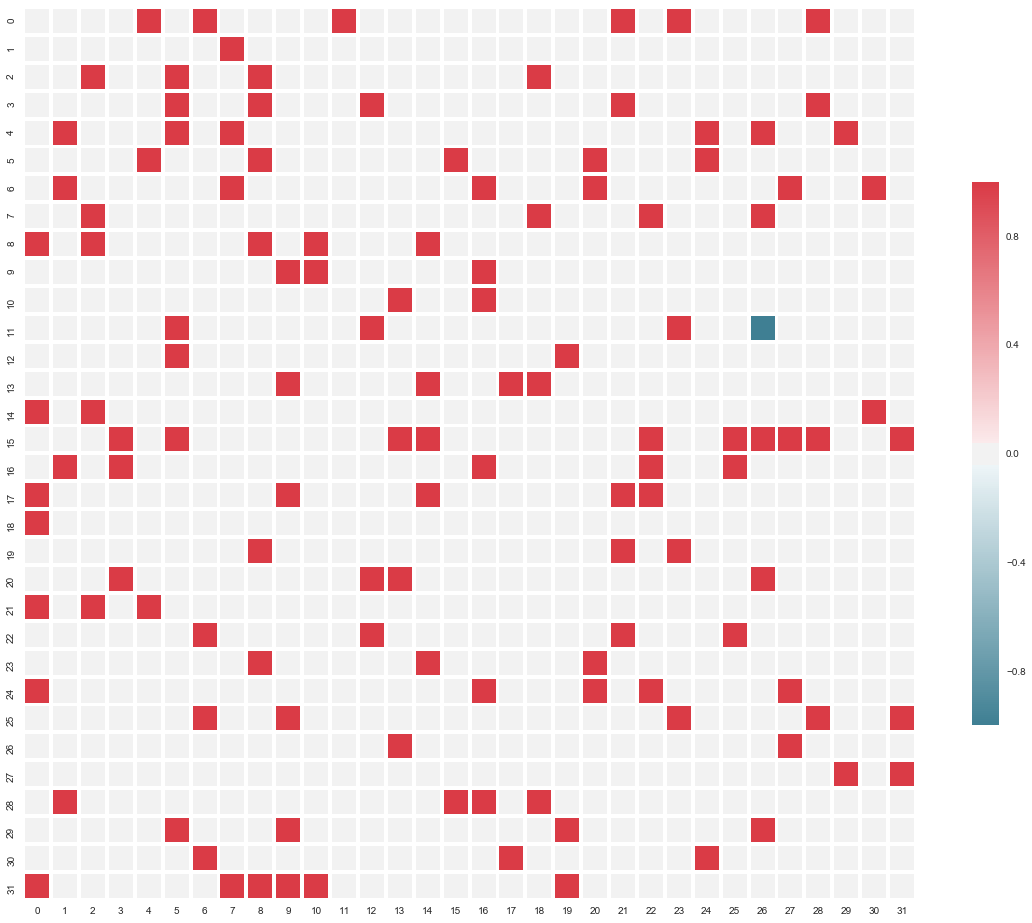

In [100]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=3, cbar_kws={"shrink": .5})

plt.show()

In [29]:
# visualize selected and not selected sensors

sensors = {}
with open('data/sensor.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((15, 15))
selected = [0, 3, 6, 8, 9, 12, 15, 17, 18, 19]
i, j = 0, 0
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    if i == selected[j]:
        grid[x][y] = 1
        j += 1
    else:
        grid[x][y] = -1
    i += 1

In [221]:
myconfig = {
    256: 0.388882393442197,
    512: 0.38711563194200865,
    1024: 0.3982618184652559,
    2048: 0.4226197435597646,
    4096: 0.4608519427881055,
    8192: 0.5318082024500825,
    16384: 0.6709536614833002
}

In [ ]:
homo = pd.read_csv('data2/homogeneous/hypothesis', header=None, delimiter=' ')
homo[5] = homo[5].astype(float)
homo

In [267]:
size = len(homo)
homo[5]
for i in range(size):
    config = homo.iloc[i, 5]
    homo.set_value(i, 5, myconfig.get(config))

In [268]:
homo.to_csv('data2/homogeneous/hypothesis', header=False, index=False)

In [ ]:
homo

In [203]:
myconfig.get(256)

0.38887482106213006

In [ ]:
hetero = pd.read_csv('data2/heterogeneous/hypothesis', header=None, delimiter=' ')
hetero[5] = hetero[5].astype(float)
hetero

In [273]:
size = len(hetero)
hetero[5]
for i in range(size):
    config = hetero.iloc[i, 5]
    hetero.set_value(i, 5, myconfig.get(config))

In [274]:
hetero.to_csv('data2/heterogeneous/hypothesis', header=False, index=False)

In [ ]:
subset_to_compute = []
ot_approx = []
with open('plot_data3/ot_approx', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('[', '')
        line = line.replace(']', ',')
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        line = line.split(',')
        size = len(line)
        subset = []
        for i in range(size-1):
            index = int(line[i])
            subset.append(index)
        ot_approx.append(line[size-1])
        subset_to_compute.append(subset)
print(subset_to_compute)
print(ot_approx)

In [263]:
num = [i for i in range(1, len(ot_approx)+1)]
ot_a = pd.DataFrame(np.array([num, ot_approx]).T)

In [265]:
ot_a.to_csv('plot_data3/ot_approx.csv', index=False, header=False)

In [3]:
hypothesis = pd.read_csv('data2/heterogeneous/hypothesis', delimiter=' ', header=None)

In [5]:
dist = hypothesis[4]
dist.count()

4096000

In [6]:
dist[dist<0.0001].count()

2589497

In [12]:
hypothesis

0   1   2   3          4         5
0         0   0  26  16   2.018247  0.977272
1         0   0  19  57   0.000000  3.174743
2         0   0  18  25   0.000000  0.493154
3         0   0  54  48   0.000000  1.721276
4         0   0  18  45   0.000000  1.244544
5         0   0  33  57   0.000000  1.575726
6         0   0  29  56   0.000000  1.194140
7         0   0  35  28   0.000000  1.575726
8         0   0  36   1   0.000000  2.357461
9         0   0   9  47   0.000000  1.215456
10        0   0  36  33   0.000000  1.354794
11        0   0  17  17  17.687904  1.244544
12        0   0  50   5   0.000000  1.575726
13        0   0   0  16   8.088948  0.685029
14        0   0  14  51   2.346458  1.215456
15        0   0  52  20   0.000000  1.746347
16        0   0  31   5   1.474738  1.524414
17        0   0  20  19   0.000000  0.685029
18        0   0  12   2  30.943574  1.194140
19        0   0   1  55   0.000000  1.721276
20        0   0  37  24   0.000000  0.933599
21        0   0  46   3   5.020003  3.174743
22        0   0  56  46   0.000000  1.244544
23        0   0  45  16   0.000000  1.495901
24        0   0   2  20   0.395026  0.685029
25        0   0   3  47   4.603231  0.685029
26        0   0  20   8   8.748455  0.685029
27        0   0  42  16   0.000000  2.357461
28        0   0  54  50   0.000000  1.726287
29        0   0  21  24   1.176020  0.685029
...      ..  ..  ..  ..        ...       ...
4095970  63  63  44   9   0.000000  1.726287
4095971  63  63  38  16   0.000000  1.746347
4095972  63  63  17  36   0.000000  0.506123
4095973  63  63  56  17   0.000000  0.493154
4095974  63  63  44  53  19.888577  1.721276
4095975  63  63   9  46   0.000000  1.524414
4095976  63  63  51  39   0.000000  0.493154
4095977  63  63  22   5   0.000000  1.721276
4095978  63  63  50  46  19.952102  2.228659
4095979  63  63   4  23   0.000000  1.244544
4095980  63  63  32  21   0.000000  0.977272
4095981  63  63   8   9   0.000000  0.995813
4095982  63  63  34  16   0.000000  1.354794
4095983  63  63  20  16   0.000000  1.746347
4095984  63  63   9  16   0.000000  0.995813
4095985  63  63  22  22   0.000000  0.995813
4095986  63  63  43  63   2.546312  2.357461
4095987  63  63  55  17   0.000000  0.493154
4095988  63  63  12  36   0.000000  3.851163
4095989  63  63  59  29   0.000000  1.575726
4095990  63  63  55   0   0.000000  3.851163
4095991  63  63   7  57   0.000000  1.140494
4095992  63  63  22  56   0.000000  1.244544
4095993  63  63  22  59   0.000000  1.495901
4095994  63  63  29  14   0.000000  0.995813
4095995  63  63  36  12   0.000000  0.977272
4095996  63  63  32   4   0.000000  1.726287
4095997  63  63   5  37   0.000000  0.995813
4095998  63  63  25  34   0.000000  1.194140
4095999  63  63  37  39  10.167418  0.506123

[4096000 rows x 6 columns]

In [11]:
summation = 0
for i in range(1000, 960, -1):
    summation += math.ceil(i/4)
summation

9820

In [7]:
np.random.randn(100).reshape(10, 10)

array([[-0.75097259,  1.06178328,  0.69879581,  1.02510598,  0.66588382,
         0.74305754, -1.05109543, -1.54722358, -0.23815156,  0.74990223],
       [ 0.91436508,  1.1896718 , -0.05209154,  0.99500269,  1.19750661,
         0.06659942, -1.10198553, -0.06601054,  0.36947556,  1.77674548],
       [ 1.03032526,  2.21562251,  0.95840857, -0.47484947, -0.6144497 ,
         0.37397402,  1.51929743, -1.08914025,  1.46281065, -1.33320279],
       [-0.03714762,  0.0750532 , -0.62637999, -0.05816952, -1.01999602,
         0.10186646,  1.22489704, -1.04139381, -0.13005311, -0.11756708],
       [ 1.48621488, -2.4886965 , -0.62508688, -0.20916544,  0.6770299 ,
        -1.39176768, -0.1106538 ,  0.28859379,  0.32112089,  0.48062669],
       [-0.01672552, -0.65560422, -0.98315156, -0.32687988,  0.33004741,
         1.02427564, -0.46790267, -1.49730365,  0.95375838, -1.07260189],
       [ 0.1567999 , -0.48821728,  1.10953997, -1.99187542,  0.38282079,
        -0.81791249, -0.20649651,  0.96839613

In [9]:
np.zeros(100).reshape(10, 10)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
def index_to_location(index, grid_len):
    return (index//grid_len, index%grid_len)

In [16]:
index_to_location(250, 16)

(15, 10)

In [2]:
pk = [0.5, 0.5]
entropy(pk, base=2)

1.0

In [3]:
a = np.zeros((50, 1024, 100))

In [8]:
a[1, 2, 1] = 1

In [9]:
a[1, 2]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
X = np.linspace(-5, 7, 101)
X

array([-5.  , -4.88, -4.76, -4.64, -4.52, -4.4 , -4.28, -4.16, -4.04,
       -3.92, -3.8 , -3.68, -3.56, -3.44, -3.32, -3.2 , -3.08, -2.96,
       -2.84, -2.72, -2.6 , -2.48, -2.36, -2.24, -2.12, -2.  , -1.88,
       -1.76, -1.64, -1.52, -1.4 , -1.28, -1.16, -1.04, -0.92, -0.8 ,
       -0.68, -0.56, -0.44, -0.32, -0.2 , -0.08,  0.04,  0.16,  0.28,
        0.4 ,  0.52,  0.64,  0.76,  0.88,  1.  ,  1.12,  1.24,  1.36,
        1.48,  1.6 ,  1.72,  1.84,  1.96,  2.08,  2.2 ,  2.32,  2.44,
        2.56,  2.68,  2.8 ,  2.92,  3.04,  3.16,  3.28,  3.4 ,  3.52,
        3.64,  3.76,  3.88,  4.  ,  4.12,  4.24,  4.36,  4.48,  4.6 ,
        4.72,  4.84,  4.96,  5.08,  5.2 ,  5.32,  5.44,  5.56,  5.68,
        5.8 ,  5.92,  6.04,  6.16,  6.28,  6.4 ,  6.52,  6.64,  6.76,
        6.88,  7.  ])

In [47]:
norm.cdf(X, 1, 2)

array([ 0.0013499 ,  0.00164106,  0.00198838,  0.00240118,  0.00289007,
        0.00346697,  0.0041453 ,  0.00494002,  0.00586774,  0.00694685,
        0.00819754,  0.00964187,  0.01130384,  0.01320938,  0.01538633,
        0.01786442,  0.02067516,  0.02385176,  0.02742895,  0.03144276,
        0.03593032,  0.04092951,  0.04647866,  0.05261614,  0.05937994,
        0.0668072 ,  0.0749337 ,  0.08379332,  0.09341751,  0.10383468,
        0.11506967,  0.12714315,  0.14007109,  0.15386423,  0.16852761,
        0.18406013,  0.20045419,  0.21769544,  0.2357625 ,  0.25462691,
        0.27425312,  0.29459852,  0.3156137 ,  0.33724273,  0.35942357,
        0.38208858,  0.40516513,  0.42857628,  0.45224157,  0.47607782,
        0.5       ,  0.52392218,  0.54775843,  0.57142372,  0.59483487,
        0.61791142,  0.64057643,  0.66275727,  0.6843863 ,  0.70540148,
        0.72574688,  0.74537309,  0.7642375 ,  0.78230456,  0.79954581,
        0.81593987,  0.83147239,  0.84613577,  0.85992891,  0.87

In [44]:
norm.pdf(X, 1, 2)

array([ 0.00221592,  0.00264817,  0.00315336,  0.00374144,  0.00442323,
        0.00521047,  0.00611576,  0.00715255,  0.00833505,  0.00967814,
        0.01119727,  0.01290829,  0.01482729,  0.01697038,  0.01935343,
        0.0219918 ,  0.02490004,  0.02809157,  0.03157828,  0.0353702 ,
        0.03947508,  0.04389804,  0.04864113,  0.05370304,  0.05907865,
        0.0647588 ,  0.07072998,  0.07697414,  0.08346852,  0.09018558,
        0.09709303,  0.1041539 ,  0.11132675,  0.11856598,  0.12582217,
        0.13304262,  0.14017191,  0.14715251,  0.15392563,  0.1604319 ,
        0.1666123 ,  0.172409  ,  0.17776626,  0.18263134,  0.1869553 ,
        0.19069391,  0.19380831,  0.19626574,  0.19804011,  0.19911242,
        0.19947114,  0.19911242,  0.19804011,  0.19626574,  0.19380831,
        0.19069391,  0.1869553 ,  0.18263134,  0.17776626,  0.172409  ,
        0.1666123 ,  0.1604319 ,  0.15392563,  0.14715251,  0.14017191,
        0.13304262,  0.12582217,  0.11856598,  0.11132675,  0.10

In [38]:
multivariate_normal(mean=1, cov=4).pdf(X)

array([ 0.02699548,  0.028669  ,  0.03041832,  0.03224476,  0.03414949,
        0.03613354,  0.03819776,  0.04034285,  0.0425693 ,  0.04487739,
        0.04726719,  0.04973857,  0.05229112,  0.05492421,  0.05763694,
        0.06042813,  0.06329634,  0.06623984,  0.06925659,  0.07234428,
        0.07550026,  0.07872159,  0.08200504,  0.08534702,  0.08874368,
        0.09219082,  0.09568396,  0.0992183 ,  0.10278876,  0.10638996,
        0.11001627,  0.11366175,  0.11732025,  0.12098536,  0.12465045,
        0.1283087 ,  0.13195308,  0.13557642,  0.1391714 ,  0.14273058,
        0.14624643,  0.14971134,  0.15311768,  0.15645778,  0.159724  ,
        0.16290875,  0.16600449,  0.1690038 ,  0.17189937,  0.17468407,
        0.17735095,  0.17989328,  0.18230457,  0.18457861,  0.18670949,
        0.18869161,  0.19051975,  0.19218904,  0.19369501,  0.1950336 ,
        0.1962012 ,  0.19719462,  0.19801116,  0.19864858,  0.19910514,
        0.19937958,  0.19947114,  0.19937958,  0.19910514,  0.19

# test dump, load, and access time

In [5]:
data = np.random.random(int(1e7))

In [8]:
%timeit data[0]

86.4 ns ± 3.78 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
data_filename_memmap = 'joblib_memmap/test'
dump(data, data_filename_memmap)

['joblib_memmap/test']

In [10]:
data2 = load(data_filename_memmap, mmap_mode='r')

In [18]:
type(data2)

numpy.core.memmap.memmap

In [12]:
%timeit data2[0]

562 ns ± 2.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
data3 = np.array(data2)

In [16]:
%timeit data3[0]

81.3 ns ± 0.555 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [24]:
output = load('joblib_memmap/discretize_x', mmap_mode='r')

In [31]:
output.shape

(128, 1024, 100)

In [33]:
%timeit output[0, 0, 0]

599 ns ± 5.69 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
output2 = np.array(output)

In [32]:
%timeit output2[0, 0, 0]

109 ns ± 0.372 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Q_function --> lookup table

In [91]:
%timeit lookup_table = np.array([1. - 0.5*(1. + math.erf(i/1.4142135623730951)) for i in np.arange(0, 8.3, 0.0001)])

80.4 ms ± 685 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
lookup_table = np.array([1. - 0.5*(1. + math.erf(i/1.4142135623730951)) for i in np.arange(0, 8.3, 0.0001)])

def lookup(q_param, lookup_table):
    if q_param > 8.3:
        return 0.
    index = int(q_param*10000)
    return lookup_table[index]

In [95]:
test = [0.001, 0.0001, 4.5, 4.6, 0.1, 0.2]
for t in test:
    print('lookup table', t, lookup(t, lookup_table))
    print('norm.sf     ', t, norm.sf(t))
    print()

lookup table 0.001 0.499601057786089
norm.sf      0.001 0.49960105778608893

lookup table 0.0001 0.4999601057720263
norm.sf      0.0001 0.4999601057720263

lookup table 4.5 3.3976731247387093e-06
norm.sf      4.5 3.3976731247300535e-06

lookup table 4.6 2.1124547024964357e-06
norm.sf      4.6 2.1124547025028537e-06

lookup table 0.1 0.460172162722971
norm.sf      0.1 0.460172162722971

lookup table 0.2 0.420740290560897
norm.sf      0.2 0.42074029056089696



In [90]:
test = [0.001, 0.0001, 4.5, 4.6, 0.1, 0.2]
for t in test:
    print('lookup table', t, lookup(t, lookup_table))
    print('norm.sf     ', t, norm.sf(t))
    print()

lookup table 0.001 0.499601057786089
norm.sf      0.001 0.49960105778608893

lookup table 0.0001 0.5
norm.sf      0.0001 0.4999601057720263

lookup table 4.5 3.3976731247387093e-06
norm.sf      4.5 3.3976731247300535e-06

lookup table 4.6 2.1124547024964357e-06
norm.sf      4.6 2.1124547025028537e-06

lookup table 0.1 0.460172162722971
norm.sf      0.1 0.460172162722971

lookup table 0.2 0.420740290560897
norm.sf      0.2 0.42074029056089696



In [63]:
%timeit lookup_table = np.array([1. - 0.5*(1. + math.erf(i/math.sqrt(2.))) for i in np.arange(0, 10, 0.001)])

11 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit lookup_table = np.array([norm.sf(i) for i in np.arange(0, 10, 0.001)])

1.25 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
np.array([1. - 0.5*(1. + math.erf(i/math.sqrt(2.))) for i in np.arange(0, 10, 0.001)])

array([0.5       , 0.49960106, 0.49920212, ..., 0.        , 0.        ,
       0.        ])

In [65]:
np.array([norm.sf(i) for i in np.arange(0, 10, 0.001)])

array([5.00000000e-01, 4.99601058e-01, 4.99202116e-01, ...,
       7.85418809e-24, 7.77529412e-24, 7.69718501e-24])

In [75]:
1. - 0.5*(1. + math.erf(8.3/math.sqrt(2.)))

0.0

In [58]:
np.arange(0, 10, 0.0001)

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 9.9997e+00, 9.9998e+00,
       9.9999e+00])

In [57]:
for i in range(0, 20):
    print(i, norm.sf(i), 1. - 0.5*(1. + math.erf(i/math.sqrt(2.))))

0 0.5 0.5
1 0.15865525393145707 0.15865525393145696
2 0.022750131948179195 0.02275013194817932
3 0.0013498980316300933 0.0013498980316301035
4 3.167124183311986e-05 3.167124183311998e-05
5 2.866515718791933e-07 2.866515718125129e-07
6 9.865876450376946e-10 9.865877004244794e-10
7 1.279812543885835e-12 1.2798651027878805e-12
8 6.22096057427174e-16 6.661338147750939e-16
9 1.1285884059538324e-19 0.0
10 7.61985302416047e-24 0.0
11 1.910659574498663e-28 0.0
12 1.776482112077653e-33 0.0
13 6.117164399549704e-39 0.0
14 7.7935368191928e-45 0.0
15 3.6709661993126986e-51 0.0
16 6.388754400537906e-58 0.0
17 4.105996202098791e-65 0.0
18 9.740948918936876e-73 0.0
19 8.527223952630975e-81 0.0


In [8]:
lookup = np.zeros(10000)

In [9]:
%timeit lookup[0]

121 ns ± 0.919 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [34]:
%timeit norm.sf(1)

122 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [111]:
np.random.seed(0)
sensor_output = np.random.rand(17)*100
np.array(sensor_output * 10000, np.int)

array([548813, 715189, 602763, 544883, 423654, 645894, 437587, 891773,
       963662, 383441, 791725, 528894, 568044, 925596,  71036,  87129,
        20218])

In [119]:
np.random.seed(0)
sensor_output = np.random.rand(17)*50
index = np.array(sensor_output * 10000, np.int)
print(index)
[i if i<390000 else 389999 for i in index]

[274406 357594 301381 272441 211827 322947 218793 445886 481831 191720
 395862 264447 284022 462798  35518  43564  10109]


[274406,
 357594,
 301381,
 272441,
 211827,
 322947,
 218793,
 389999,
 389999,
 191720,
 389999,
 264447,
 284022,
 389999,
 35518,
 43564,
 10109]

In [120]:
norm(0, 1).pdf(39)

0.0

In [102]:
truncate = lambda x: x if x<38999 else 38999

In [136]:
alist = [(1, 1), (2, 3)]
blist = [(1, 1), (3, 10)]
list(set(alist).union(set(blist)))

[(3, 10), (2, 3), (1, 1)]

In [131]:
alist.remove(blist)

ValueError: list.remove(x): x not in list

In [81]:
lookup_table_norm = norm(0, 1).pdf(np.arange(0, 39, 0.0001))

In [126]:
mean_vec = np.zeros(17)
std = np.ones(17)*1
sensor_output = np.random.rand(17)*50
sensor_output

array([ 0.93949002, 30.88177485, 30.60478614, 30.84669984, 47.18740393,
       34.09101496, 17.97539503, 21.85159769, 34.8815598 ,  3.01127358,
       33.33833577, 33.53189348, 10.51912805,  6.44631488, 15.77141755,
       18.18553855, 28.50983852])

In [127]:
def get_pdfs(mean_vec, stds, sensor_outputs):
    ''' Replace norm(mean_vec, stds).pdf(sensor_outputs[sensor_subset])
    '''
    sensor_outputs = np.abs((sensor_outputs - mean_vec) / stds)
    index = [i if i<390000 else 389999 for i in np.array(sensor_outputs * 10000, np.int)]
    #index = [i if i<390000 else 389999 for i in index]
    return lookup_table_norm[index]

In [128]:
%timeit get_pdfs(mean_vec, std, sensor_output)
get_pdfs(mean_vec, std, sensor_output)

12.2 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


array([2.56615939e-001, 3.25132747e-208, 1.62350825e-204, 9.60606846e-208,
       0.00000000e+000, 1.71078015e-253, 2.74257710e-071, 8.23563200e-105,
       2.47586538e-265, 4.28514344e-003, 1.79594353e-242, 2.78320636e-245,
       3.74325812e-025, 3.77923101e-010, 3.87564694e-055, 6.13228925e-073,
       1.26399192e-177])

In [93]:
%timeit get_pdfs(mean_vec, std, sensor_output)
get_pdfs(mean_vec, std, sensor_output)

3.64 µs ± 26.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


array([2.05543048e-09, 2.93086768e-01, 8.79172993e-09, 1.95379265e-02,
       2.75231002e-08, 4.92152714e-10, 4.83037762e-02, 1.18560595e-07,
       6.86241536e-07, 4.00885958e-02, 6.63404745e-22, 1.77950314e-10,
       2.16977276e-11, 3.69046518e-01, 1.07228885e-02, 9.58868547e-05,
       5.29084045e-19])

In [94]:
sensor_output

array([6.17809769, 0.78530113, 5.93818926, 2.45627914, 5.74277269,
       6.40524561, 2.05499306, 5.48252338, 5.15231737, 2.14374238,
       9.78226303, 6.56215554, 6.87539867, 0.39478233, 2.68942783,
       4.08250593, 9.07350258])

In [78]:
%timeit np.array([norm(0, 1).pdf(i) for i in np.arange(0, 39, 0.01)])

2.54 s ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
mynorm = norm(0, 1)

In [76]:
%timeit np.array([mynorm.pdf(i) for i in np.arange(0, 39, 0.01)])

318 ms ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%timeit norm(0, 1).pdf(np.arange(0, 39, 0.1))

665 µs ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%timeit norm(0, 1).pdf(np.ones(20))

644 µs ± 3.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
norm(0, 1).pdf(np.ones(17))

array([0.24197072, 0.24197072, 0.24197072, 0.24197072, 0.24197072,
       0.24197072, 0.24197072, 0.24197072, 0.24197072, 0.24197072,
       0.24197072, 0.24197072, 0.24197072, 0.24197072, 0.24197072,
       0.24197072, 0.24197072])

In [59]:
for i in range(50):
    print(i, norm(0, 1).pdf(i))

0 0.3989422804014327
1 0.24197072451914337
2 0.05399096651318806
3 0.0044318484119380075
4 0.00013383022576488537
5 1.4867195147342979e-06
6 6.075882849823286e-09
7 9.134720408364595e-12
8 5.052271083536893e-15
9 1.0279773571668917e-18
10 7.69459862670642e-23
11 2.1188192535093538e-27
12 2.1463837356630605e-32
13 7.998827757006813e-38
14 1.0966065593889713e-43
15 5.530709549844416e-50
16 1.0261630727919036e-56
17 7.004182134318583e-64
18 1.758749542595104e-71
19 1.624636036773608e-79
20 5.520948362159764e-88
21 6.902029420127222e-97
22 3.1742815528252627e-106
23 5.370560365020593e-116
24 3.342714441794458e-126
25 7.653929736419393e-137
26 6.447259971397853e-148
27 1.9978892591682797e-159
28 2.277577478736661e-171
29 9.551694541948838e-184
30 1.4736461348785476e-196
31 8.363951605856463e-210
32 1.746366256758777e-223
33 1.3414196673494362e-237
34 3.790526400092868e-252
35 3.940396277136024e-267
36 1.5069047176203946e-282
37 2.120006551524606e-298
38 1.097221052e-314
39 0.0
40 0.0
41 0.0

In [45]:
%timeit 1. - 0.5*(1. + math.erf(1/math.sqrt(2.)))

903 ns ± 0.481 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [50]:
%timeit 1. - 0.5*(1. + math.erf(1/1.4142135623730951))

682 ns ± 0.471 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [49]:
math.sqrt(2.)

1.4142135623730951

In [41]:
%timeit lookup[0]

166 ns ± 0.358 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [51]:
lookup[1]=1

In [52]:
%timeit (lookup[1] - lookup[1])**2 / lookup[1] + lookup[1]

1.41 µs ± 3.58 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [96]:
%timeit math.sqrt(2)

176 ns ± 0.114 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [97]:
%timeit math.sqrt(2.123)

153 ns ± 0.04 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [98]:
%timeit 2.2 ** 2

19.5 ns ± 0.00416 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [99]:
%timeit 2.2*2.2

19.5 ns ± 0.00139 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# Latitude (y), Longitude (x)

In [102]:
a = (-73.081539 + 73.129160)/2

In [108]:
a

0.023810499999996182

In [109]:
a - 73.129160 

-73.1053495

In [110]:
b = (40.885853-40.849868)/2

In [113]:
b + 40.849868

40.8678605

In [1]:
left_up    = (-73.143383, 40.896615)
right_up   = (-73.067228, 40.896615)
left_down  = (-73.143383, 40.839021)  # here is (0, 0)
right_down = (-73.067228, 40.839021)
grid_len   = 64
long_step  = (right_up[0] - left_up[0])/grid_len
lat_step   = (right_up[1] - right_down[1])/grid_len

In [2]:
long_step, lat_step

(0.0011899218749999996, 0.0008999062499999155)

In [3]:
trans_long_lat = []  # in the end, print in (lat, long)
for i in range(grid_len):
    for j in range(grid_len):
        x = left_down[0] + i*long_step
        y = left_down[1] + j*lat_step
        trans_long_lat.append((x, y))

In [4]:
trans_long_lat

[(-73.143383, 40.839021),
 (-73.143383, 40.83992090625),
 (-73.143383, 40.8408208125),
 (-73.143383, 40.841720718750004),
 (-73.143383, 40.842620625),
 (-73.143383, 40.84352053125),
 (-73.143383, 40.844420437500006),
 (-73.143383, 40.845320343750004),
 (-73.143383, 40.84622025),
 (-73.143383, 40.84712015625),
 (-73.143383, 40.8480200625),
 (-73.143383, 40.84891996875),
 (-73.143383, 40.849819875),
 (-73.143383, 40.85071978125),
 (-73.143383, 40.851619687500005),
 (-73.143383, 40.85251959375),
 (-73.143383, 40.8534195),
 (-73.143383, 40.85431940625),
 (-73.143383, 40.8552193125),
 (-73.143383, 40.85611921875),
 (-73.143383, 40.857019125),
 (-73.143383, 40.85791903125),
 (-73.143383, 40.858818937500004),
 (-73.143383, 40.85971884375),
 (-73.143383, 40.86061875),
 (-73.143383, 40.86151865625),
 (-73.143383, 40.8624185625),
 (-73.143383, 40.86331846875),
 (-73.143383, 40.864218375),
 (-73.143383, 40.86511828125),
 (-73.143383, 40.8660181875),
 (-73.143383, 40.86691809375),
 (-73.143383, 40

In [5]:
with open('dataSplat/lat_long', 'w') as f:
    for tran in trans_long_lat:
        f.write('{}, {}, {}\n'.format(tran[1], tran[0], 30.0))

# Visualize

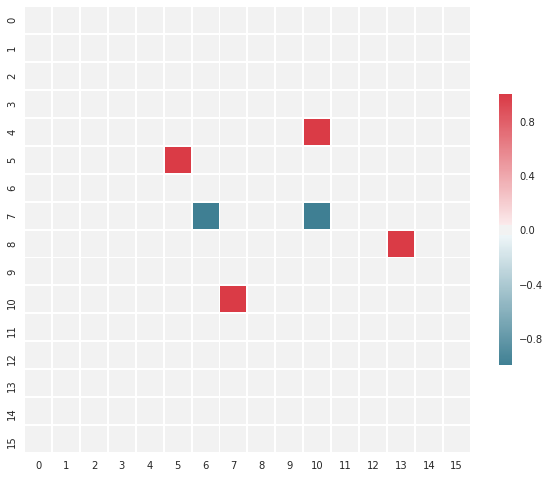

In [17]:
grid_len=16
grid = np.zeros((grid_len, grid_len))

Tx = [118, 122]
Sensors = [(4, 10), (5, 5), (8, 13), (10, 7)]

for tx in Tx:
    x = tx//grid_len
    y = tx%grid_len
    grid[x, y] = -1

for s in Sensors:
    grid[s[0], s[1]] = 1


sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=1, cbar_kws={"shrink": .5})

plt.show()

In [25]:
def combine(s, b):
    prod = 1
    for i in range(s, s-b, -1):
        prod *= i
    for i in range(1, b+1):
        prod /= i
    return int(prod)

In [33]:
combine(40, 6) / 16

239898.75

In [7]:
array = np.ix_(range(0, 40*40, 40), range(0, 40*40, 40))

In [14]:
array = np.arange(36).reshape(6, 6)

In [15]:
array

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [16]:
np.ix_([1,3],[2,5])

(array([[1],
        [3]]), array([[2, 5]]))

In [17]:
array[np.ix_([1,3],[2,5])]

array([[ 8, 11],
       [20, 23]])